

### Q1) What is Prostate Cancer?
Prostate cancer is cancer that occurs in the prostate ,a small walnut-shaped gland in men that produces the seminal fluid that nourishes and transports sperm.

Prostate cancer is one of the most common types of cancer in men. Usually prostate cancer grows slowly and is initially confined to the prostate gland, where it may not cause serious harm. However, while some types of prostate cancer grow slowly and may need minimal or even no treatment, other types are aggressive and can spread quickly.

<img src="https://www.mayoclinic.org/-/media/kcms/gbs/patient-consumer/images/2013/11/15/17/38/ds00043_-my01633_im01561_prostca1thu_jpg.jpg" height="100px">

### Q2) How it is tested and detected?
Prostate screening tests might include:

* Digital rectal exam (DRE): During a DRE, your doctor inserts a gloved, lubricated finger into your rectum to examine your prostate, which is adjacent to the rectum. If your doctor finds any abnormalities in the texture, shape or size of the gland, you may need further tests.
* Prostate-specific antigen (PSA) test: A blood sample is drawn from a vein in your arm and analyzed for PSA, a substance that's naturally produced by your prostate gland. It's normal for a small amount of PSA to be in your bloodstream. However, if a higher than normal level is found, it may indicate prostate infection, inflammation, enlargement or cancer.

If a DRE or PSA test detects an abnormality, your doctor may recommend further tests to determine whether you have prostate cancer, such as:

* Ultrasound : If other tests raise concerns, your doctor may use transrectal ultrasound to further evaluate your prostate. A small probe, about the size and shape of a cigar, is inserted into your rectum. The probe uses sound waves to create a picture of your prostate gland.
* Collecting a sample of prostate tissue : If initial test results suggest prostate cancer, your doctor may recommend a procedure to collect a sample of cells from your prostate (prostate biopsy). Prostate biopsy is often done using a thin needle that's inserted into the prostate to collect tissue. The tissue sample is analyzed in a lab to determine whether cancer cells are present.

### Q3) Where does GLEASON score fit-in all of this?
When a biopsy confirms the presence of cancer, the next step is to determine the level of aggressiveness (grade) of the cancer cells. A laboratory pathologist examines a sample of your cancer to determine how much cancer cells differ from the healthy cells. A higher grade indicates a more aggressive cancer that is more likely to spread quickly.

The most common scale used to evaluate the grade of prostate cancer cells is called a Gleason score. Gleason scoring combines two numbers and can range from 2 (nonaggressive cancer) to 10 (very aggressive cancer), though the lower part of the range isn't used as often.



According to current guidelines by the International Society of Urological Pathology (ISUP), the Gleason scores are summarized into an ISUP grade on a scale from 1 to 5 according to the following rule:

* Gleason score 6 = ISUP grade 1 
* Gleason score 7 (3 + 4) = ISUP grade 2 
* Gleason score 7 (4 + 3) = ISUP grade 3 
* Gleason score 8 = ISUP grade 4 
* Gleason score 9-10 = ISUP grade 5 

If there is no cancer in the sample, we use the label ISUP grade 0 in this competition. 

<img src="https://storage.googleapis.com/kaggle-media/competitions/PANDA/Screen%20Shot%202020-04-08%20at%202.03.53%20PM.png" height="100px">

### Q6) How has the Gleason scores been generated in the dataset?
Each WSI in this challenge contains one, or in some cases two, thin tissue sections cut from a single biopsy sample. Prior to scanning, the tissue is stained with haematoxylin & eosin (H&E). This is a standard way of staining the originally transparent tissue to produce some contrast. The samples are made up of glandular tissue and connective tissue. The glands are hollow structures, which can be seen as white “holes” or branched cavities in the WSI. The appearance of the glands forms the basis of the Gleason grading system. The glandular structure characteristic of healthy prostate tissue is progressively lost with increasing grade. The grading system recognizes three categories: 3, 4, and 5. 

* [A]Benign prostate glands with folded epithelium :The cytoplasm is pale and the nuclei small and regular. The glands are grouped together.
* [B]Prostatic adenocarcinoma : Gleason Pattern 3 has no loss of glandular differentiation. Small glands infiltrate between benign glands. The cytoplasm is often dark and the nuclei enlarged with dark chromatin and some prominent nucleoli. Each epithelial unit is separate and has a lumen.
* [C]Prostatic adenocarcinoma : Gleason Pattern 4 has partial loss of glandular differentiation. There is an attempt to form lumina but the tumor fails to form complete, well-developed glands. This microphotograph shows irregular cribriform cancer, i.e. epithelial sheets with multiple lumina. There are also some poorly formed small glands and some fused glands. All of these are included in Gleason Pattern 4.
* [D]Prostatic adenocarcinoma : Gleason Pattern 5 has an almost complete loss of glandular differentiation. Dispersed single cancer cells are seen in the stroma. Gleason Pattern 5 may also contain solid sheets or strands of cancer cells. All microphotographs show hematoxylin and eosin stains at 20x lens magnification.

<img src="https://storage.googleapis.com/kaggle-media/competitions/PANDA/GleasonPattern_4squares%20copy500.png" height="100px">

# Preliminaries
Now Let's Begin by Importing the data

In [67]:
#BASIC
import numpy as np 
import pandas as pd 
import os

# DATA visualization
import matplotlib.pyplot as plt
import seaborn as sns
import PIL
from IPython.display import Image, display
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

import openslide


In [68]:
# BASE_FOLDER = r"E:\data\prostate-cancer-grade-assessment\"
BASE_FOLDER = "/data/prostate-cancer-grade-assessment/"

# !ls {BASE_FOLDER}# 

In [69]:
mask_dir = r'E:\data\prostate-cancer-grade-assessment\train_label_masks'

In [70]:
train = pd.read_csv(r'E:\data\prostate-cancer-grade-assessment\train.csv')
test = pd.read_csv(r'E:\data\prostate-cancer-grade-assessment\test.csv')
sub = pd.read_csv(r'E:\data\prostate-cancer-grade-assessment\sample_submission.csv')

In [71]:
train.head()

,image_id,data_provider,isup_grade,gleason_score
0,0005f7aaab2800f6170c399693a96917,karolinska,0,0+0
1,000920ad0b612851f8e01bcc880d9b3d,karolinska,0,0+0
2,0018ae58b01bdadc8e347995b69f99aa,radboud,4,4+4
3,001c62abd11fa4b57bf7a6c603a11bb9,karolinska,4,4+4
4,001d865e65ef5d2579c190a0e0350d8f,karolinska,0,0+0


In [72]:
train.drop([7273],inplace=True) #Mislabelled 

**Negative and 0+0 are same labels only from different data-providers and are interchangeable**
<br>Let's go ahead and change negative to '0+0'

In [73]:
train['gleason_score'] = train['gleason_score'].apply(lambda x: "0+0" if x=="negative" else x)

# Exploratory Data Analysis


In [74]:
temp = train.groupby('isup_grade').count()['image_id'].reset_index().sort_values(by='image_id',ascending=False)
temp.style.background_gradient(cmap='Purples')

,isup_grade,image_id
0,0,2892
1,1,2666
2,2,1342
4,4,1249
3,3,1242
5,5,1224


In [75]:
fig = go.Figure(go.Funnelarea(
    text =temp.isup_grade,
    values = temp.image_id,
    title = {"position": "top center", "text": "Funnel-Chart of ISUP_grade Distribution"}
    ))
fig.show()

In [76]:
fig = px.bar(temp, x='isup_grade', y='image_id',
             hover_data=['image_id', 'isup_grade'], color='image_id',
             labels={'pop':'population of Canada'}, height=400)
fig.show()

We see that the isup_grade 0 and 1 i.e no cancer, has the most number of values and that's what expected in case of most medical datasets , the target class will always be underrepresented and that's also the most important challenge when performing machine learning tasks on Medical DATA

Now let's Look at how much data is provided by which data-provider

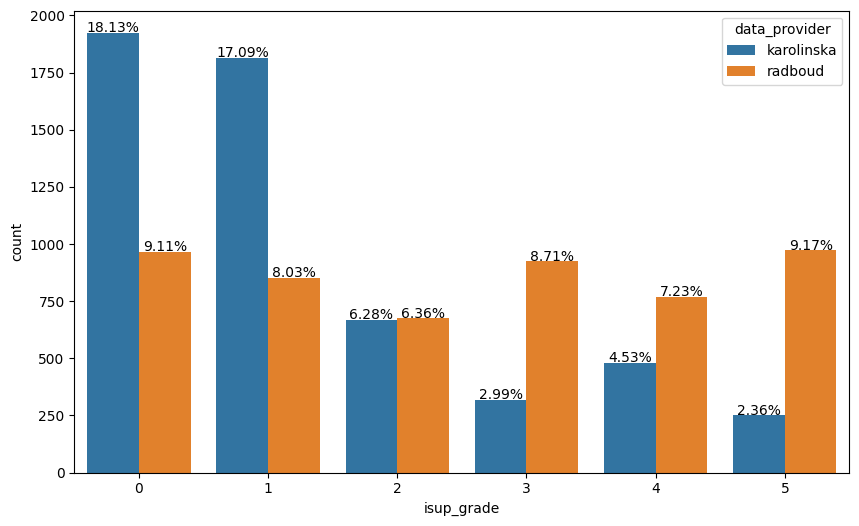

In [77]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x="isup_grade", hue="data_provider", data=train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,
                height +3,
                '{:1.2f}%'.format(100*height/10616),
                ha="center")

Now Let's Look at the gleason score distribution as well

In [78]:
temp = train.groupby('gleason_score').count()['image_id'].reset_index().sort_values(by='image_id',ascending=False)
temp.style.background_gradient(cmap='Reds')

,gleason_score,image_id
0,0+0,2892
1,3+3,2666
2,3+4,1342
4,4+3,1242
5,4+4,1126
6,4+5,849
8,5+4,248
9,5+5,127
3,3+5,80
7,5+3,43


In [79]:
fig = go.Figure(go.Funnelarea(
    text =temp.gleason_score,
    values = temp.image_id,
    title = {"position": "top center", "text": "Funnel-Chart of ISUP_grade Distribution"}
    ))
fig.show()

In [80]:
fig = px.bar(temp, x='gleason_score', y='image_id',
             hover_data=['image_id', 'gleason_score'], color='image_id',
             labels={'pop':'population of Canada'}, height=400)
fig.show()

From this graph it is also clear that the data will be baised towards non-cancer examples

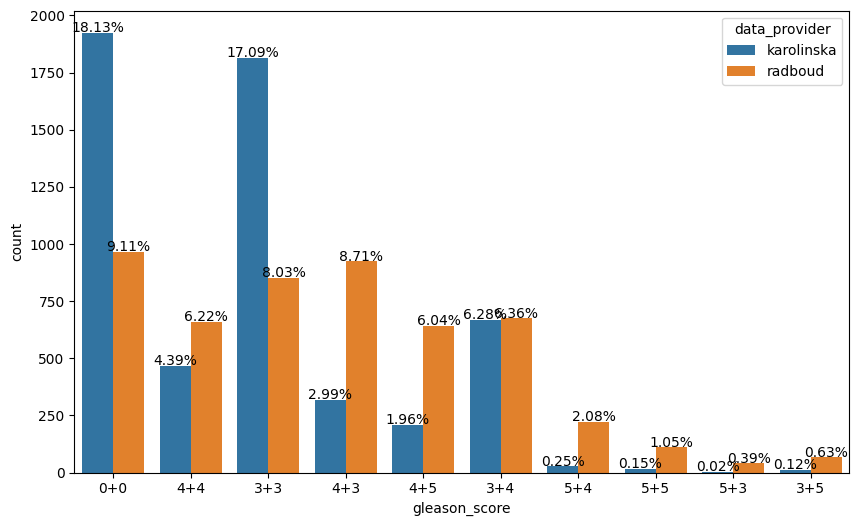

In [81]:
'''
Visualizing the GLEASON_SCORE distribution wrt Data_providers
'''

fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x="gleason_score", hue="data_provider", data=train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/10616),
                ha="center")

# Image EDA

## Q1) What is .tff format and Why it is used?

Tagged Image File Format (TIFF) is a variable-resolution bitmapped image format developed by Aldus (now part of Adobe) in 1986. TIFF is very common for transporting color or gray-scale images into page layout applications, but is less suited to delivering web content.

Reasons for Usage:
* IFF files are large and of very high quality. Baseline TIFF images are highly portable; most graphics, desktop publishing, and word processing applications understand them.
* The TIFF specification is readily extensible, though this comes at the price of some of its portability. Many applications incorporate their own extensions, but a number of application-independent extensions are recognized by most programs.
* Four types of baseline TIFF images are available: bilevel (black and white), gray scale, palette (i.e., indexed), and RGB (i.e., true color). RGB images may store up to 16.7 million colors. Palette and gray-scale images are limited to 256 colors or shades. A common extension of TIFF also allows for CMYK images.
* TIFF files may or may not be compressed. A number of methods may be used to compress TIFF files, including the Huffman and LZW algorithms. Even compressed, TIFF files are usually much larger than similar GIF or JPEG files.
* Because the files are so large and because there are so many possible variations of each TIFF file type, few web browsers can display them without plug-ins.

## Q2) What are image levels?
In some image formats the image data has a fixed amount of possible intensities. For instance an image may be defined as uint8 (unsigned integer 8-bit) which means that each pixel can have a value (intensity) between 0-255, and each intensity is a whole number (integer) in that range. So that gives 256 possible intensity levels. Another way to interpret this would be layers. An RGB (red green blue) type image uses three layers to define colour (a single layer would define a large-scale image, some image types contain more than 3 layers). For each pixel there are 3 intensity levels, 1 for each colour, are defined and together (using a kind of mixing of the colours) they define the colour of that pixels. Similarly for a grayscale there can be two levels i.e black and white

## Q3) What is Down-sampling and Up-sampling in Image processing?
Downsampling and upsampling are two fundamental and widely used image operations, with
applications in image display, compression, and progressive transmission. Downsampling is
the reduction in spatial resolution while keeping the same two-dimensional (2D) representation. It is typically used to reduce the storage and/or transmission requirements of images.
Upsampling is the increasing of the spatial resolution while keeping the 2D representation
of an image. It is typically used for zooming in on a small region of an image, and for
eliminating the pixelation effect that arises when a low-resolution image is displayed on a
relatively large frame



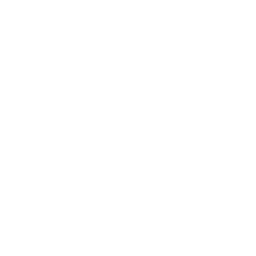

In [91]:



# Open the image (does not yet read the image into memory)
example = openslide.OpenSlide(os.path.join(r'E:\data\prostate-cancer-grade-assessment\train_images\0a8b2cefacdad96c6005799832055629.tiff'))

# Read a specific region of the image starting at upper left coordinate (x=17800, y=19500) on level 0 and extracting a 256*256 pixel patch.
# At this point image data is read from the file and loaded into memory.
patch = example.read_region((17800,19500), 0, (256, 256))

# Display the image
display(patch)

# Close the opened slide after use
example.close()

Now Let's see what all information can we get out of an image after creating an Openslide object

In [83]:
train = train.set_index('image_id')
train.head()

,data_provider,isup_grade,gleason_score
image_id,,,
0005f7aaab2800f6170c399693a96917,karolinska,0,0+0
000920ad0b612851f8e01bcc880d9b3d,karolinska,0,0+0
0018ae58b01bdadc8e347995b69f99aa,radboud,4,4+4
001c62abd11fa4b57bf7a6c603a11bb9,karolinska,4,4+4
001d865e65ef5d2579c190a0e0350d8f,karolinska,0,0+0


In [84]:
def get_values(image,max_size=(600,400)):
    slide = openslide.OpenSlide(os.path.join(BASE_FOLDER+"train_images", f'{image}.tiff'))
    
    # Here we compute the "pixel spacing": the physical size of a pixel in the image.
    # OpenSlide gives the resolution in centimeters so we convert this to microns.
    f,ax =  plt.subplots(2 ,figsize=(6,16))
    spacing = 1 / (float(slide.properties['tiff.XResolution']) / 10000)
    patch = slide.read_region((1780,1950), 0, (256, 256)) #ZOOMED FUGURE
    ax[0].imshow(patch) 
    ax[0].set_title('Zoomed Image')
    
    
    ax[1].imshow(slide.get_thumbnail(size=max_size)) #UNZOOMED FIGURE
    ax[1].set_title('Full Image')
    
    
    print(f"File id: {slide}")
    print(f"Dimensions: {slide.dimensions}")
    print(f"Microns per pixel / pixel spacing: {spacing:.3f}")
    print(f"Number of levels in the image: {slide.level_count}")
    print(f"Downsample factor per level: {slide.level_downsamples}")
    print(f"Dimensions of levels: {slide.level_dimensions}\n\n")
    
    print(f"ISUP grade: {train.loc[image, 'isup_grade']}")
    print(f"Gleason score: {train.loc[image, 'gleason_score']}")

* This Function prints Zoomed and Non-Zoomed images side by side and also all the information that can be derived from it
* You can read about what every function does in the documentation of Open slide
* You can play around with the read_region to zoom in different parts of an image and by little modifications you can build a function that takes in multiple images and displays their zoomed and non-Zoomed Images side by side

File id: OpenSlide('/data/prostate-cancer-grade-assessment/train_images\\0a6c5a120961974a7dae8cf11245ff73.tiff')
Dimensions: (18924, 32128)
Microns per pixel / pixel spacing: 0.503
Number of levels in the image: 3
Downsample factor per level: (1.0, 4.0, 16.00507614213198)
Dimensions of levels: ((18924, 32128), (4731, 8032), (1182, 2008))


ISUP grade: 1
Gleason score: 3+3


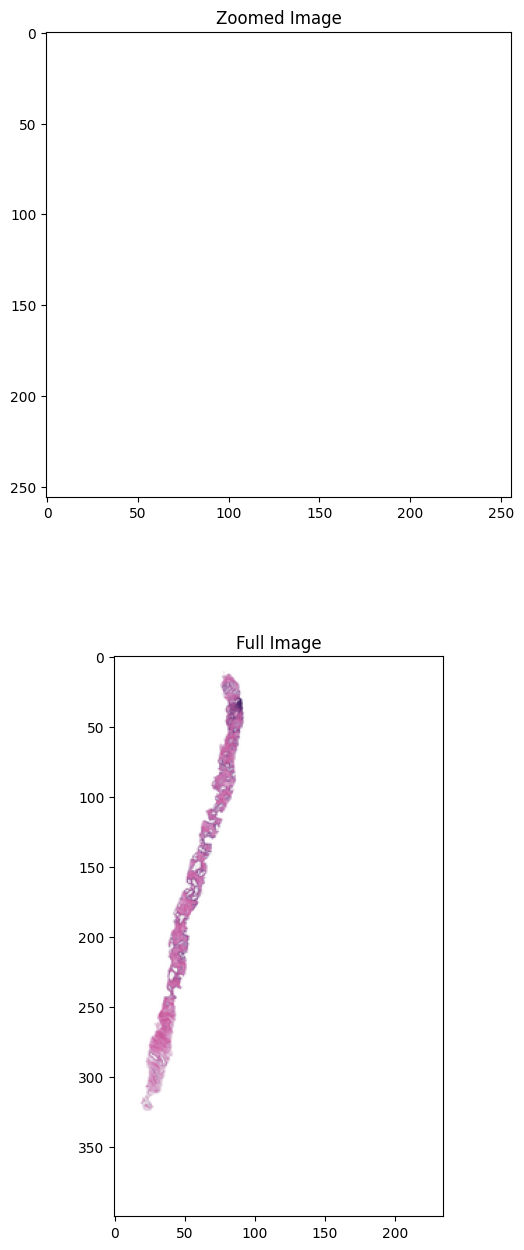

In [90]:
get_values('0a6c5a120961974a7dae8cf11245ff73')

In [86]:
import os
import openslide
import matplotlib.pyplot as plt

def display_images(images):
    '''
    This function takes in input a list of images. It then iterates through the image making openslide objects , on which different functions
    for getting out information can be called later
    '''
    if len(images) < 1:
        print("No images to display.")
        return
    
    image = images[0]  # Get the first image from the list
    slide = openslide.OpenSlide(os.path.join(BASE_FOLDER + "train_images", f'{image}.tiff'))  # Making Openslide Object
    # Here we compute the "pixel spacing": the physical size of a pixel in the image,
    # OpenSlide gives the resolution in centimeters so we convert this to microns
    spacing = 1 / (float(slide.properties['tiff.XResolution']) / 10000)
    patch = slide.read_region((1780, 1950), 0, (256, 256))  # Reading the image as before between x=1780 to y=1950 and of pixel size =256*256

    # Display the image
    plt.figure(figsize=(8, 8))
    plt.imshow(patch)  # Displaying Image
    slide.close()
    plt.axis('off')

    image_id = image
    data_provider = train.loc[image, 'data_provider']
    isup_grade = train.loc[image, 'isup_grade']
    gleason_score = train.loc[image, 'gleason_score']
    plt.title(f"ID: {image_id}\nSource: {data_provider} ISUP: {isup_grade} Gleason: {gleason_score}")

    plt.show()

# Usage:
# display_images(["image_id_1", "image_id_2", ...])


In [87]:
import os
import openslide
import matplotlib.pyplot as plt
from PIL import Image

def display_images(images, save_path='/input/pro/'):
    if len(images) < 1:
        print("No images to display.")
        return
    
    image = images[0]
    slide = openslide.OpenSlide(os.path.join(BASE_FOLDER + "train_images", f'{image}.tiff'))
    spacing = 1 / (float(slide.properties['tiff.XResolution']) / 10000)
    patch = slide.read_region((1780, 1950), 0, (256, 256))
    
    # Display the image
    plt.figure(figsize=(8, 8))
    plt.imshow(patch)
    slide.close()
    plt.axis('off')

    image_id = image
    data_provider = train.loc[image, 'data_provider']
    isup_grade = train.loc[image, 'isup_grade']
    gleason_score = train.loc[image, 'gleason_score']
    print(f"ID: {image_id}\nSource: {data_provider} ISUP: {isup_grade} Gleason: {gleason_score}")
    
    if save_path:
        # Save the image
        save_image_path = os.path.join(save_path, f"{image_id}.png")
        patch = patch.convert("RGB")
        patch.save(save_image_path, "PNG")
        print(f"Saved image to {save_image_path}")

    plt.show()

# Usage:
# display_images(["image_id_1", "image_id_2", ...], save_path="output_folder")


ID: 07a7ef0ba3bb0d6564a73f4f3e1c2293
Source: karolinska ISUP: 4 Gleason: 4+4
Saved image to /input/pro/07a7ef0ba3bb0d6564a73f4f3e1c2293.png


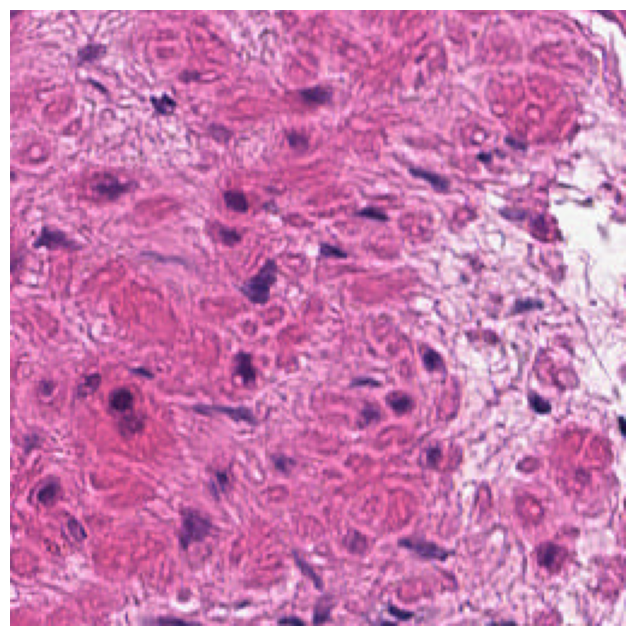

In [88]:
images = [
'07a7ef0ba3bb0d6564a73f4f3e1c2293'

]

display_images(images)

